# Chapter 3

## 1) Build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Perform a grid search for the best hyperparameters for a KNeighbors model

We will start by importing scikit learn and numpy

In [1]:
import sklearn 
import numpy as np  

Now let´s import the MINST dataset from sklearn datasets 

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
#To get the description of the dataset we can should access to it by using it´s key, since the object imported is dictionary-like
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Then we unpack the target vector and the matrix with all the instances

In [3]:
X,y = mnist['data'],mnist['target']

Using matplotlib we can take a look at an instance of the X matrix

In [4]:
import matplotlib.pyplot as plt 

In [7]:
def plot_digit(instance):
    side_length = int(np.sqrt(len(instance)))
    digit = instance.reshape(side_length,side_length)
    plt.imshow(digit)


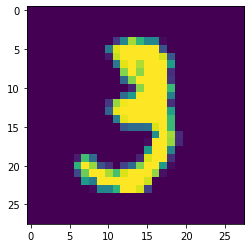

In [8]:
plot_digit(X[10])

In [9]:
#And it´s corresponding label :
y[10]

'3'

It may be better to set the labels as integer values:

In [10]:
y = y.astype(np.uint8)

The next step is to split the data to a train set and a test set. Luckily this dataset is already splitted, being the first 60 000 rows of data the train set and the rest corresponds to the test set.

In [11]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Now, we can perform the grid search to find the best hyperparameters for a KNeighbors model, we will look for 'weights' and 'n_neighbors'

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#We have to create a parameters grid with the hyperparmeters we want to optimize and the values to be used

param_grid = [{'weights' : ['uniform','distance'], 'n_neighbors' : [3,4,5]}]

#Initializing a KNeighbors model:
k_neighbors = KNeighborsClassifier()

#Perform grid search:
grid_search = GridSearchCV(k_neighbors,param_grid=param_grid, cv = 5, verbose=3, n_jobs=-1)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


## 2) Write a function that can shift the MNIST dataset in any direction by one pixel and add copies for each instance to the training dataset


In [12]:
from scipy.ndimage.interpolation import shift

In [88]:
def shift_instance(instance,y,x):
    instance = instance.reshape(28,28)
    shifted = shift(instance,[y,x],cval=0,mode='constant')
    return shifted.reshape([-1])


In [80]:
X_train_aug = [instance for instance in X_train]
y_train_aug = [label for label in y_train]

In [87]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for instance, label in zip(X_train, y_train):
        X_train_aug.append(shift_instance(instance,dy,dx))
        y_train_aug.append(label)

X_train_aug= np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)


TypeError: 'tuple' object is not callable

In [ ]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)